In [1]:
import cv2
import numpy as np
import easyocr
import re
import matplotlib.pyplot as plt
from tkinter import filedialog

In [2]:
reader = easyocr.Reader(['te'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
#image_path=filedialog.askopenfilename(title="Select an Image", filetypes=[("Image Files", "*.png;*.jpg;*.jpeg;*.bmp;*.tiff")])

In [3]:
image_path='C:/Users/SHAM/OneDrive/Documents/xx.jpg'

In [4]:
image = cv2.imread(image_path)

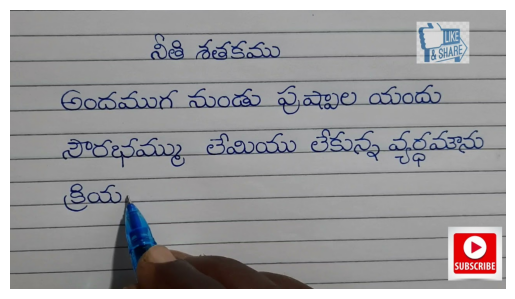

In [5]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#plt.title(title)
plt.axis('off')
plt.show()



In [6]:
import os
print(os.path.exists(image_path))

True


In [7]:
image

array([[[ 70,  70,  70],
        [ 70,  70,  70],
        [ 69,  69,  69],
        ...,
        [163, 163, 163],
        [163, 163, 163],
        [163, 163, 163]],

       [[ 75,  75,  75],
        [ 75,  75,  75],
        [ 75,  75,  75],
        ...,
        [163, 163, 163],
        [163, 163, 163],
        [163, 163, 163]],

       [[108, 108, 108],
        [109, 109, 109],
        [112, 112, 112],
        ...,
        [163, 163, 163],
        [163, 163, 163],
        [163, 163, 163]],

       ...,

       [[126, 130, 131],
        [126, 130, 131],
        [126, 130, 131],
        ...,
        [149, 151, 152],
        [149, 151, 152],
        [149, 151, 152]],

       [[126, 130, 131],
        [126, 130, 131],
        [126, 130, 131],
        ...,
        [149, 151, 152],
        [149, 151, 152],
        [149, 151, 152]],

       [[126, 130, 131],
        [126, 130, 131],
        [126, 130, 131],
        ...,
        [149, 151, 152],
        [149, 151, 152],
        [149, 151, 152]]

In [8]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
# Apply noise reduction
denoised = cv2.fastNlMeansDenoising(gray)
        
# Enhance contrast using CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(denoised)
       

In [9]:
enhanced

array([[ 61,  60,  60, ..., 154, 154, 154],
       [ 68,  68,  68, ..., 154, 154, 154],
       [107, 107, 108, ..., 154, 154, 154],
       ...,
       [127, 127, 127, ..., 131, 131, 131],
       [127, 127, 127, ..., 131, 131, 131],
       [127, 127, 127, ..., 134, 134, 134]], dtype=uint8)

In [10]:
# Apply binary thresholding
_, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [11]:
kernel = np.ones((2,2), np.uint8)

In [12]:
# Dilation to connect broken components
processed_image= cv2.dilate(binary, kernel, iterations=1)
        

In [13]:
processed_image

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [14]:
#TEXT EXTRACTION 

In [15]:
results = reader.readtext(processed_image)

In [16]:
results


[([[1113, 51], [1167, 51], [1167, 89], [1113, 89]], '1ట', 0.33007577586575937),
 ([[477, 71], [709, 71], [709, 135], [477, 135]],
  '(ెఢరము',
  0.09661476191636294),
 ([[125, 196], [660, 196], [660, 268], [125, 268]],
  'ఇందముగ నుండు_',
  0.4307210848224391),
 ([[681, 186], [1124, 186], [1124, 267], [681, 267]],
  'పష్పాల_యందు',
  0.2554672339349922),
 ([[128, 324], [462, 324], [462, 404], [128, 404]],
  'నరరము _',
  0.24214391648977165),
 ([[502, 322], [750, 322], [750, 378], [502, 378]],
  'లంయయ',
  0.026649434119462967),
 ([[762, 292], [974, 292], [974, 390], [762, 390]],
  'లేకున్న',
  0.989245611453739),
 ([[1035, 302], [1234, 302], [1234, 369], [1035, 369]],
  'రవౌను',
  0.9707057490681861),
 ([[1169, 583], [1245, 583], [1245, 645], [1169, 645]],
  ' 11',
  0.002121334088528151),
 ([[1144, 646], [1260, 646], [1260, 678], [1144, 678]],
  'స0స(ష36',
  0.02438197001627076),
 ([[1099.405095554342, 95.33171977498706],
   [1163.129120578192, 86.50829287292119],
   [1166.594904445658, 1

In [17]:
extracted_text = ' '.join([result[1] for result in results])

In [18]:
extracted_text

'1ట (ెఢరము ఇందముగ నుండు_ పష్పాల_యందు నరరము _ లంయయ లేకున్న రవౌను  11 స0స(ష36 {స1?'

In [19]:
class TeluguGrammarChecker:
    def __init__(self):
        #Initialize Telugu grammar rules and patterns.
        # Sentence-ending punctuation marks
        self.sentence_endings = ['।', '.', '?', '!']
        
        # Verb endings for different tenses
        self.verb_endings = {
            'present': ['తున్నాను', 'తున్నాము', 'తున్నాడు', 'తున్నారు', 'తోంది'],
            'past': ['ాను', 'ాము', 'ాడు', 'ింది', 'ారు'],
            'future': ['తాను', 'తాము', 'తాడు', 'తుంది', 'తారు']
        }
        
        # Common case markers
        self.case_markers = ['కి', 'లో', 'పై', 'నుండి', 'తో', 'కోసం']
        
        # Common particles and their valid positions
        self.particles = ['గా', 'ే', 'ో']
        
        # Subject pronouns
        self.subject_pronouns = ['నేను', 'మేము', 'అతను', 'ఆమె', 'వారు']

    def split_sentences(self, text: str) -> list:
        #Spliting Telugu text into sentences using punctuation marks.
        sentences = []  #for list of sentences
        current_sentence = ""
        
        for char in text:
            current_sentence += char
            if char in self.sentence_endings:
                sentences.append(current_sentence.strip())
                current_sentence = ""
        
        if current_sentence.strip():
            sentences.append(current_sentence.strip())
            
        return sentences
#Check grammar in Telugu text and return a list of errors
    def check_grammar(self, text: str) -> list:
        #error list
        errors = []
        sentences = self.split_sentences(text)
        
        for idx, sentence in enumerate(sentences, 1):
            words = sentence.split()
            
            # Check sentence structure
            structure_errors = self._check_sentence_structure(words)
            if structure_errors:
                errors.extend([{
                    'sentence_number': idx,
                    'error_type': error['type'],
                    'suggestion': error['suggestion']
                } for error in structure_errors])
            
            # Check subject-verb agreement
            agreement_error = self._check_subject_verb_agreement(words)
            if agreement_error:
                errors.append({
                    'sentence_number': idx,
                    'error_type': 'subject_verb_agreement',
                    'suggestion': agreement_error
                })
            
            # Check each word
            for word_idx, word in enumerate(words, 1):
                # Check case marker usage
                case_error = self._check_case_marker_usage(word)
                if case_error:
                    errors.append({
                        'sentence_number': idx,
                        'word_position': word_idx,
                        'word': word,
                        'error_type': 'case_marker',
                        'suggestion': case_error
                    })
                
                # Check particle usage
                particle_error = self._check_particle_usage(word, word_idx, len(words))
                if particle_error:
                    errors.append({
                        'sentence_number': idx,
                        'word_position': word_idx,
                        'word': word,
                        'error_type': 'particle',
                        'suggestion': particle_error
                    })
            
            # Check tense consistency
            tense_error = self._check_tense_consistency(words)
            if tense_error:
                errors.append({
                    'sentence_number': idx,
                    'error_type': 'tense',
                    'suggestion': tense_error
                })
        
        return errors
        
#Check basic Telugu sentence structure (SOV order).
    def _check_sentence_structure(self, words: list) -> list:
        errors = []
        
        if len(words) < 2:
            errors.append({
                'type': 'structure',
                'suggestion': 'Sentence is incomplete'
            })
        
        # Check for verb at the end
        last_word = words[-1] if words else ""
        has_verb_ending = False
        
        for tense_endings in self.verb_endings.values():
            if any(last_word.endswith(ending) for ending in tense_endings):
                has_verb_ending = True
                break
        
        if not has_verb_ending:
            errors.append({
                'type': 'structure',
                'suggestion': 'Sentence should end with a verb'
            })
        
        return errors
#CONCORD AGREEMENT
    def _check_subject_verb_agreement(self, words: list) -> str:
        subject = None
        verb = None
        
        # Find subject and verb
        for word in words:
            if word in self.subject_pronouns:
                subject = word
            for tense_endings in self.verb_endings.values():
                if any(word.endswith(ending) for ending in tense_endings):
                    verb = word
                    break
        
        if subject and verb:
            # Basic agreement rules (simplified)
            if subject == 'నేను' and not any(verb.endswith(end) for end in ['ాను', 'తాను', 'తున్నాను']):
                return "Subject-verb agreement error with 'నేను'"
            if subject == 'మేము' and not any(verb.endswith(end) for end in ['ాము', 'తాము', 'తున్నాము']):
                return "Subject-verb agreement error with 'మేము'"
        
        return None

    def _check_case_marker_usage(self, word: str) -> str:
        """
        Check if case markers are used correctly.
        
        Args:
            word (str): Word to check.
        
        Returns:
            str: Error message if case marker is misused, otherwise None.
        """
        for marker in self.case_markers:
            if word.endswith(marker):
                # Check for double case markers
                remaining = word[:-len(marker)]
                if any(remaining.endswith(m) for m in self.case_markers):
                    return "Multiple case markers detected"
        return None

    def _check_particle_usage(self, word: str, position: int, total_words: int) -> str:
        """
        Check if particles are used correctly.
        
        Args:
            word (str): Word to check.
            position (int): Position of the word in the sentence.
            total_words (int): Total number of words in the sentence.
        
        Returns:
            str: Error message if particle is misused, otherwise None.
        """
        for particle in self.particles:
            if word.endswith(particle):
                if position == total_words and particle != 'గా':
                    return "Incorrect particle position at sentence end"
        return None
# Check tense consistency throughout the sentence.
    def _check_tense_consistency(self, words: list) -> str:
        found_tenses = set()
        
        for word in words:
            for tense, endings in self.verb_endings.items():
                if any(word.endswith(ending) for ending in endings):
                    found_tenses.add(tense)
        
        if len(found_tenses) > 1:
            return "Mixed tenses detected in the sentence"
        return None

In [20]:
grammar_checker = TeluguGrammarChecker()

In [21]:
errors = grammar_checker.check_grammar(extracted_text)

In [22]:
errors

[{'sentence_number': 1,
  'error_type': 'structure',
  'suggestion': 'Sentence should end with a verb'}]

In [23]:
if errors:
    print("Grammar Errors Found:")
    for error in errors:
        print("\nSentence", error['sentence_number'])
        if 'word' in error:
            print(f"Word: {error['word']}")
        print(f"Error Type: {error['error_type']}")
        print(f"Suggestion: {error['suggestion']}")
else:
    print("No grammar errors found.")

Grammar Errors Found:

Sentence 1
Error Type: structure
Suggestion: Sentence should end with a verb


In [24]:
errors

[{'sentence_number': 1,
  'error_type': 'structure',
  'suggestion': 'Sentence should end with a verb'}]